# 데이터 EDA 및 시각화
* EDA
겹치는 object를 잘 탐지하는 방법
한 이미지안에 다양한 object class 가 있을 때 잘 탐지하는 방법

* 모델 학습 이후 시각화
클래스를 잘못 예측 했을때 클래스끼리 헷갈리는 이미지, 같은 클래스 내에서 모양이 다른지 고민해보기 -> 데모

# bbox 30개 이상 또는 class 수 6개 이상인 train 데이터에 bbox 시각화해 별도 저장

In [7]:
import os
os.getcwd()

'/opt/ml'

In [8]:
import pandas as pd
df = pd.read_csv('./cleaning.csv')

In [9]:
# bbox 함께 그려서 저장할 file name list
outlier_list = df.file_name.tolist()

[770.3, 421.9, 29.0, 37.6]
[913.8, 774.8, 40.1, 40.0]
[740.6, 451.7, 71.6, 72.5]
[750.7, 479.8, 40.9, 19.3]
[705.0, 490.7, 266.7, 271.2]
[580.8, 410.1, 129.5, 129.7]
[32.8, 629.5, 59.2, 63.3]
[331.7, 285.8, 104.9, 176.8]
[509.2, 305.8, 98.0, 138.8]
[328.6, 878.4, 99.6, 101.2]
[401.5, 311.2, 149.1, 227.2]
[407.4, 427.7, 188.4, 196.4]
[72.1, 464.9, 105.4, 264.8]
[496.5, 576.7, 104.6, 142.6]
[114.8, 278.3, 218.2, 235.0]
[160.0, 641.0, 102.3, 133.4]
[132.6, 421.9, 278.1, 276.7]
[227.3, 603.1, 88.6, 263.8]
[311.6, 575.3, 252.4, 314.6]
[482.8, 571.6, 232.9, 338.6]
[679.9, 724.0, 280.1, 195.0]
[397.0, 541.1, 31.2, 39.3]


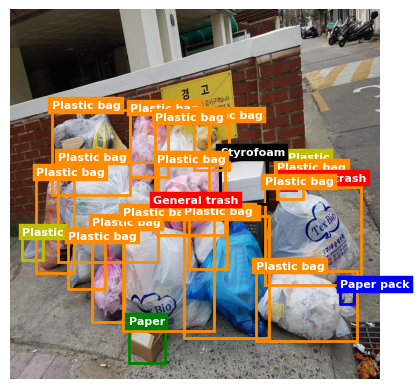

In [21]:
import json
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

#
dataset_dir = '/opt/ml/dataset/'
# train.json 파일 경로
train_json_path = "/opt/ml/dataset/train.json"

# 시각화된 이미지 저장 경로 -> ipynb이 다른 경로 에 있을때 사용
# save_dir = '../dataset/outlier_bbox'

# train.json 파일 불러오기
with open(train_json_path, "r") as f:
    train_data = json.load(f)

# 이미지와 bbox 정보 시각화 함수
def visualize_bbox(image, image_id, bbox_list, class_list):
    """
    image: PIL.Image 객체
    bbox_list: bbox 좌표 리스트 [x_min, y_min, width, height]
    """
    plt.imshow(image)
    plt.axis('off') # 축제거 
    ax = plt.gca()
    colors = ["r", "g", "b", "c", "m", "y", "k", "darkorange", "limegreen", "deepskyblue"] # bbox 색상 리스트
    classes = ["General trash", "Paper", "Paper pack", "Metal", "Glass","Plastic", "Styrofoam", "Plastic bag", "Battery", "Clothing"]
    
    for i, (bbox, class_id) in enumerate(zip(bbox_list, class_list)):
        # bbox 좌표 추출
        x, y, w, h = bbox
        print(bbox)
        # bbox 시각화
        rect = plt.Rectangle((x, y), w, h, linewidth=2, edgecolor=colors[class_id], facecolor="none")
        ax.add_patch(rect)

        # bbox 라벨 시각화
        label = classes[class_id]
        # ax.text(x, y-5, label, fontsize=8, color=colors[class_id], fontweight="bold")
        bbox_props = dict(boxstyle="square,pad=0.3", fc=colors[class_id], ec=colors[class_id], lw=0.3)
        # '''
        # fc 속성을 사용하여 글자 배경 색상을 설정하고,
        # ec 속성을 사용하여 상자 테두리 색상을 설정합니다. 
        # lw 속성을 사용하여 상자 테두리 두께를 설정할 수 있습니다.
        # '''
        ax.text(x, y-5, label, fontsize=8, color="w", fontweight="bold", bbox=bbox_props)

    image_id = str(10000+image_id)[1:]# 0000자리로 통일
    # plt.savefig(f'./train/{image_id}.jpg', bbox_inches='tight')
    plt.show() # 이미지 저장만하고 시각화 안 할 경우 각주 처리

# 모든 이미지에 대한 bbox 시각화
for image_info in train_data["images"]:
    if image_info['file_name'] in outlier_list:
        # 이미지 파일 경로
        image_path = image_info["file_name"]
        
        # 이미지 불러오기
        image = Image.open(dataset_dir+image_path)
        
        # 해당 이미지에 대한 annotation 정보 추출
        image_id = image_info["id"]
        bbox_list = []
        class_list = []
        for annotation_info in train_data["annotations"]:
            if annotation_info["image_id"] == image_id:
                bbox_list.append(annotation_info["bbox"])
                class_list.append(annotation_info["category_id"])
        
        # 이미지와 bbox 정보 시각화
        visualize_bbox(image, image_id, bbox_list, class_list)
        break

## 조건별 이미지 추출
1. bbox 40개 이상만

In [14]:
bbox40up = df[df.bbox_num >= 40]
print(len(bbox40up))
outlier_dir = '/opt/ml/baseline/dataset/outlier_bbox/' # 시각화할 이미지 경로

14


In [15]:
sorted_df = df.sort_values(by = ['bbox_num', 'unique_class_num'])
bboxunder10 = df[df.bbox_num < 10]
bboxunder20 = df[df.bbox_num < 20]
bboxunder30 = df[df.bbox_num < 30]
bboxunder40 = df[df.bbox_num < 40]
bboxup40 = df[df.bbox_num >= 40]

In [16]:
sorted_df

,file_name,bbox_num,unique_class_num
32,train/2317.jpg,7,6
97,train/0170.jpg,7,6
15,train/3662.jpg,8,6
14,train/2863.jpg,9,6
68,train/0152.jpg,9,6
...,...,...,...
109,train/2416.jpg,46,4
54,train/0394.jpg,48,2
41,train/4047.jpg,52,4
104,train/0946.jpg,55,6


### bbox가 10개 미만일 경우 시각화
* 여러개 종류의 쓰레기가 보임

In [17]:
image_path

'train/0042.jpg'

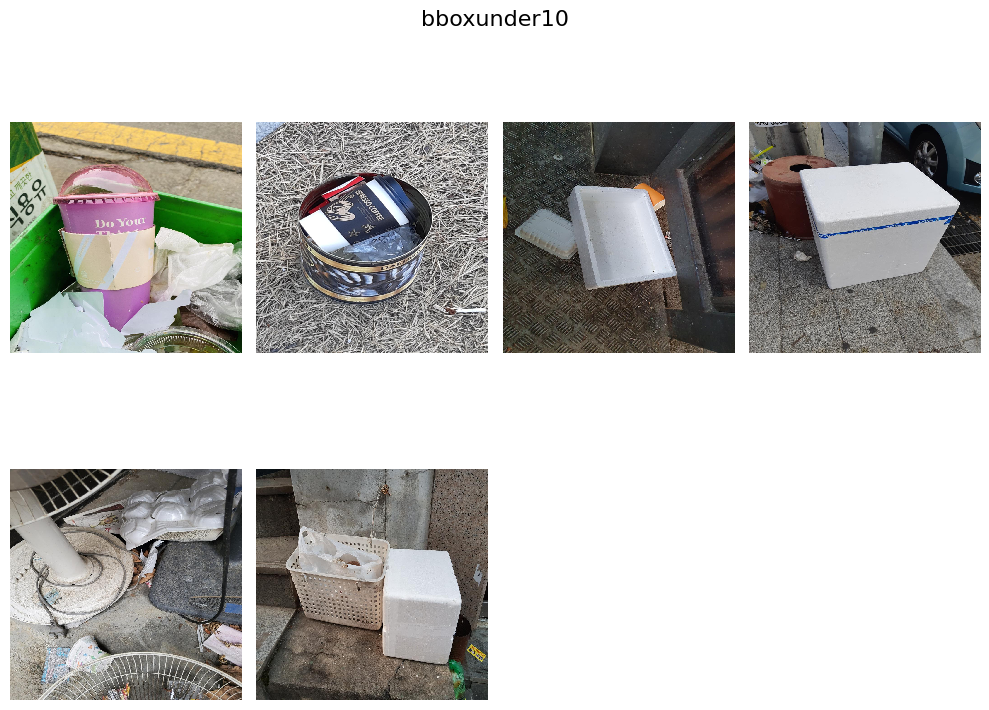

In [18]:
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import numpy as np

fig = plt.figure(figsize=(10, 8)) # rows*cols 행렬의 i번째 subplot 생성
rows = len(bboxunder10) // 4 + 1
cols = 4
fig.suptitle("bboxunder10", fontsize=16)
for i, image_path in enumerate(bboxunder10.file_name.tolist()):
    image_path = os.path.join("/opt/ml/dataset", image_path)
    img = cv2.imread(image_path)
    if img is None:
        print(f"Failed to read image at {image_path}")
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax = fig.add_subplot(rows, cols, i+1)
    ax.imshow(img,interpolation='nearest')
    ax.axis('off')

plt.tight_layout()
plt.show()


클래스별로 이미지 시각적 확인  
bbox 개수 기준  
unique class 기준



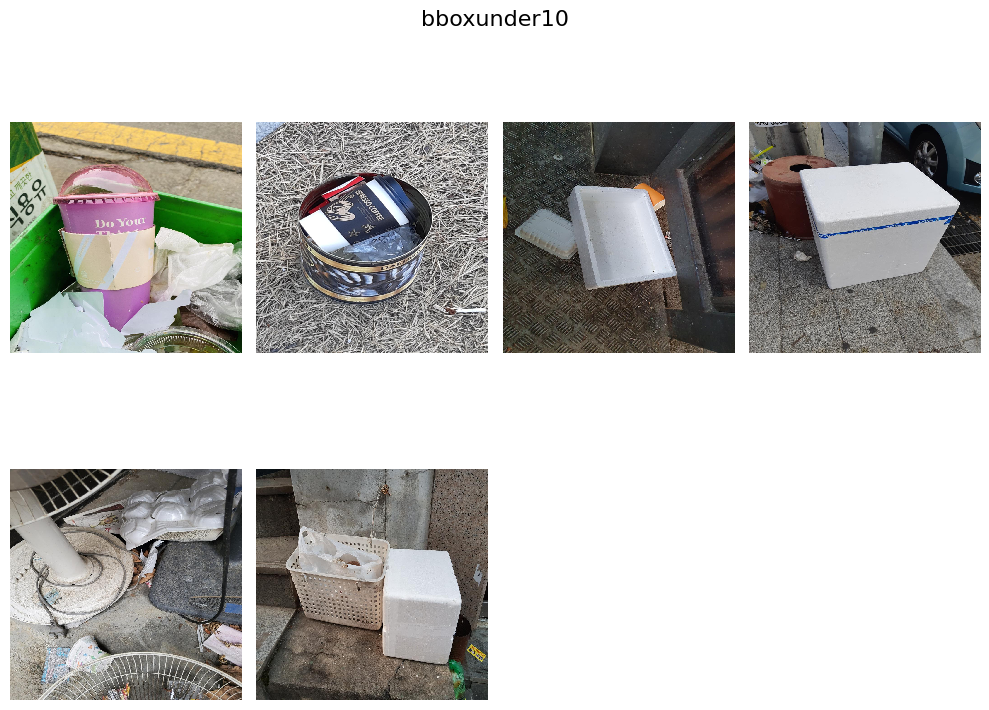

In [19]:
fig = plt.figure(figsize=(10, 8)) # rows*cols 행렬의 i번째 subplot 생성
rows = len(bboxunder10) // 4 + 1
cols = 4
fig.suptitle("bboxunder10", fontsize=16)
for i, image_path in enumerate(bboxunder10.file_name.tolist()):
    image_path = os.path.join("/opt/ml/dataset", image_path)
    img = cv2.imread(image_path)
    if img is None:
        print(f"Failed to read image at {image_path}")
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax = fig.add_subplot(rows, cols, i+1)
    ax.imshow(img,interpolation='nearest')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [20]:
bbox_list

[[770.3, 421.9, 29.0, 37.6],
 [913.8, 774.8, 40.1, 40.0],
 [740.6, 451.7, 71.6, 72.5],
 [750.7, 479.8, 40.9, 19.3],
 [705.0, 490.7, 266.7, 271.2],
 [580.8, 410.1, 129.5, 129.7],
 [32.8, 629.5, 59.2, 63.3],
 [331.7, 285.8, 104.9, 176.8],
 [509.2, 305.8, 98.0, 138.8],
 [328.6, 878.4, 99.6, 101.2],
 [401.5, 311.2, 149.1, 227.2],
 [407.4, 427.7, 188.4, 196.4],
 [72.1, 464.9, 105.4, 264.8],
 [496.5, 576.7, 104.6, 142.6],
 [114.8, 278.3, 218.2, 235.0],
 [160.0, 641.0, 102.3, 133.4],
 [132.6, 421.9, 278.1, 276.7],
 [227.3, 603.1, 88.6, 263.8],
 [311.6, 575.3, 252.4, 314.6],
 [482.8, 571.6, 232.9, 338.6],
 [679.9, 724.0, 280.1, 195.0],
 [397.0, 541.1, 31.2, 39.3]]